# F-Fade results with Darpa

Bash Command to get the result

`python3 main.py --dataset ./data/darpa.txt --embedding_size 200 --t_setup 8000 --W_upd 720 --T_th 120 --alpha 0.999 --epoch 5 --online_train_steps 10 --M 100 --model_dir ./result/`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, confusion_matrix
import plotnine
from plotnine import ggplot, geom_point, aes, geom_line, geom_text, labs, xlab, ylab, theme_minimal

## Open result files

In [2]:
data = pd.read_csv('data/darpa.txt', sep=" ", names=['timestamp','source_ID','destination_ID', 'Label'])
data

,timestamp,source_ID,destination_ID,Label
0,1,1,2,0
1,1,1,2,0
2,6,3,4,0
3,6,3,4,0
4,7,2,1,0
...,...,...,...,...
4554339,87724,10,4,0
4554340,87724,10,4,0
4554341,87725,4,3,0
4554342,87725,4,10,0


In [3]:
y_pred  = pd.read_csv('result/score.txt', sep=" ", names=['Prediction'])
y_pred

,Prediction
0,2687.362675
1,2687.362675
2,1335.596021
3,2676.916774
4,2676.916774
...,...
4375224,67.852682
4375225,67.852682
4375226,43.232473
4375227,7.170154


## Result Analysis

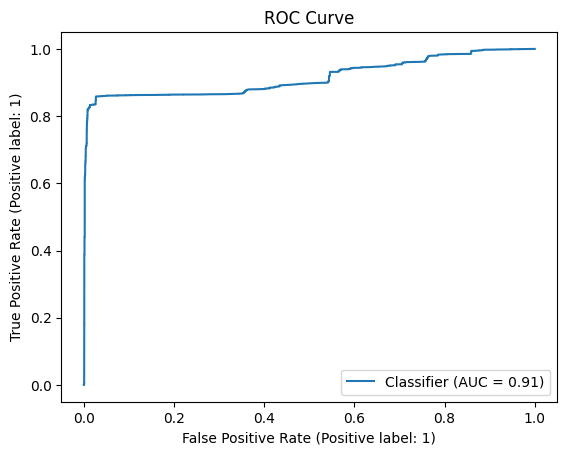

In [4]:
data_true=data[-len(y_pred):] #only select data that are predicted (after tsetup)
RocCurveDisplay.from_predictions(data_true['Label'], y_pred['Prediction'])
#plt.title('ROC Curve of F-Fade on DARPA')
plt.title('ROC Curve')
#plt.plot([0,1], [0,1])
plt.show()

In [5]:
fpr, tpr, thresholds = roc_curve(data_true['Label'], y_pred['Prediction'], pos_label = 1)

Best Threshold: 3507.5758 with G-Mean: 0.9138
FPR: 0.0273, TPR: 0.8585


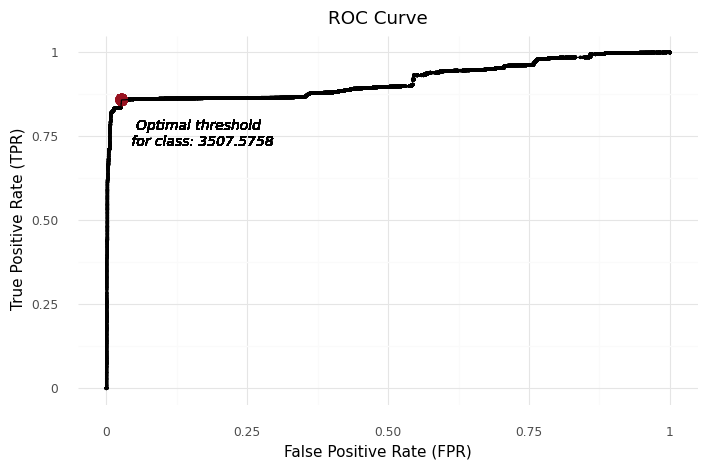

<ggplot: (8759599795918)>

In [6]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

The optimal thereshold is 3507.57.

With this thereshold, we build the **matrix confusion**.

In [7]:
data_true['Prediction'] = np.where(y_pred['Prediction']<3507.5758, 0, 1).copy()

data_true['Prediction'].value_counts()

/tmp/ipykernel_495/254318005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1    2393497
0    1981732
Name: Prediction, dtype: int64

In [8]:
confusion_matrix(data_true['Label'], data_true['Prediction'])

array([[1594228,   44787],
       [ 387504, 2348710]])

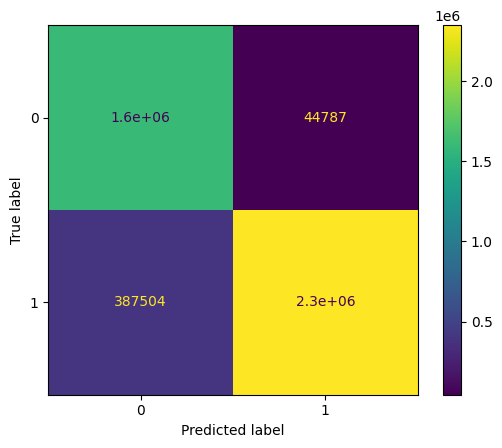

In [9]:
ConfusionMatrixDisplay.from_predictions(data_true['Label'], data_true['Prediction'])

In [10]:
TPR=2348710/(387504+2348710)
FPR=44787/(1594228+44787)
print(f'TPR {TPR}')
print(f'FPR {FPR}')

TPR 0.8583794980948127
FPR 0.027325558338392265
